No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


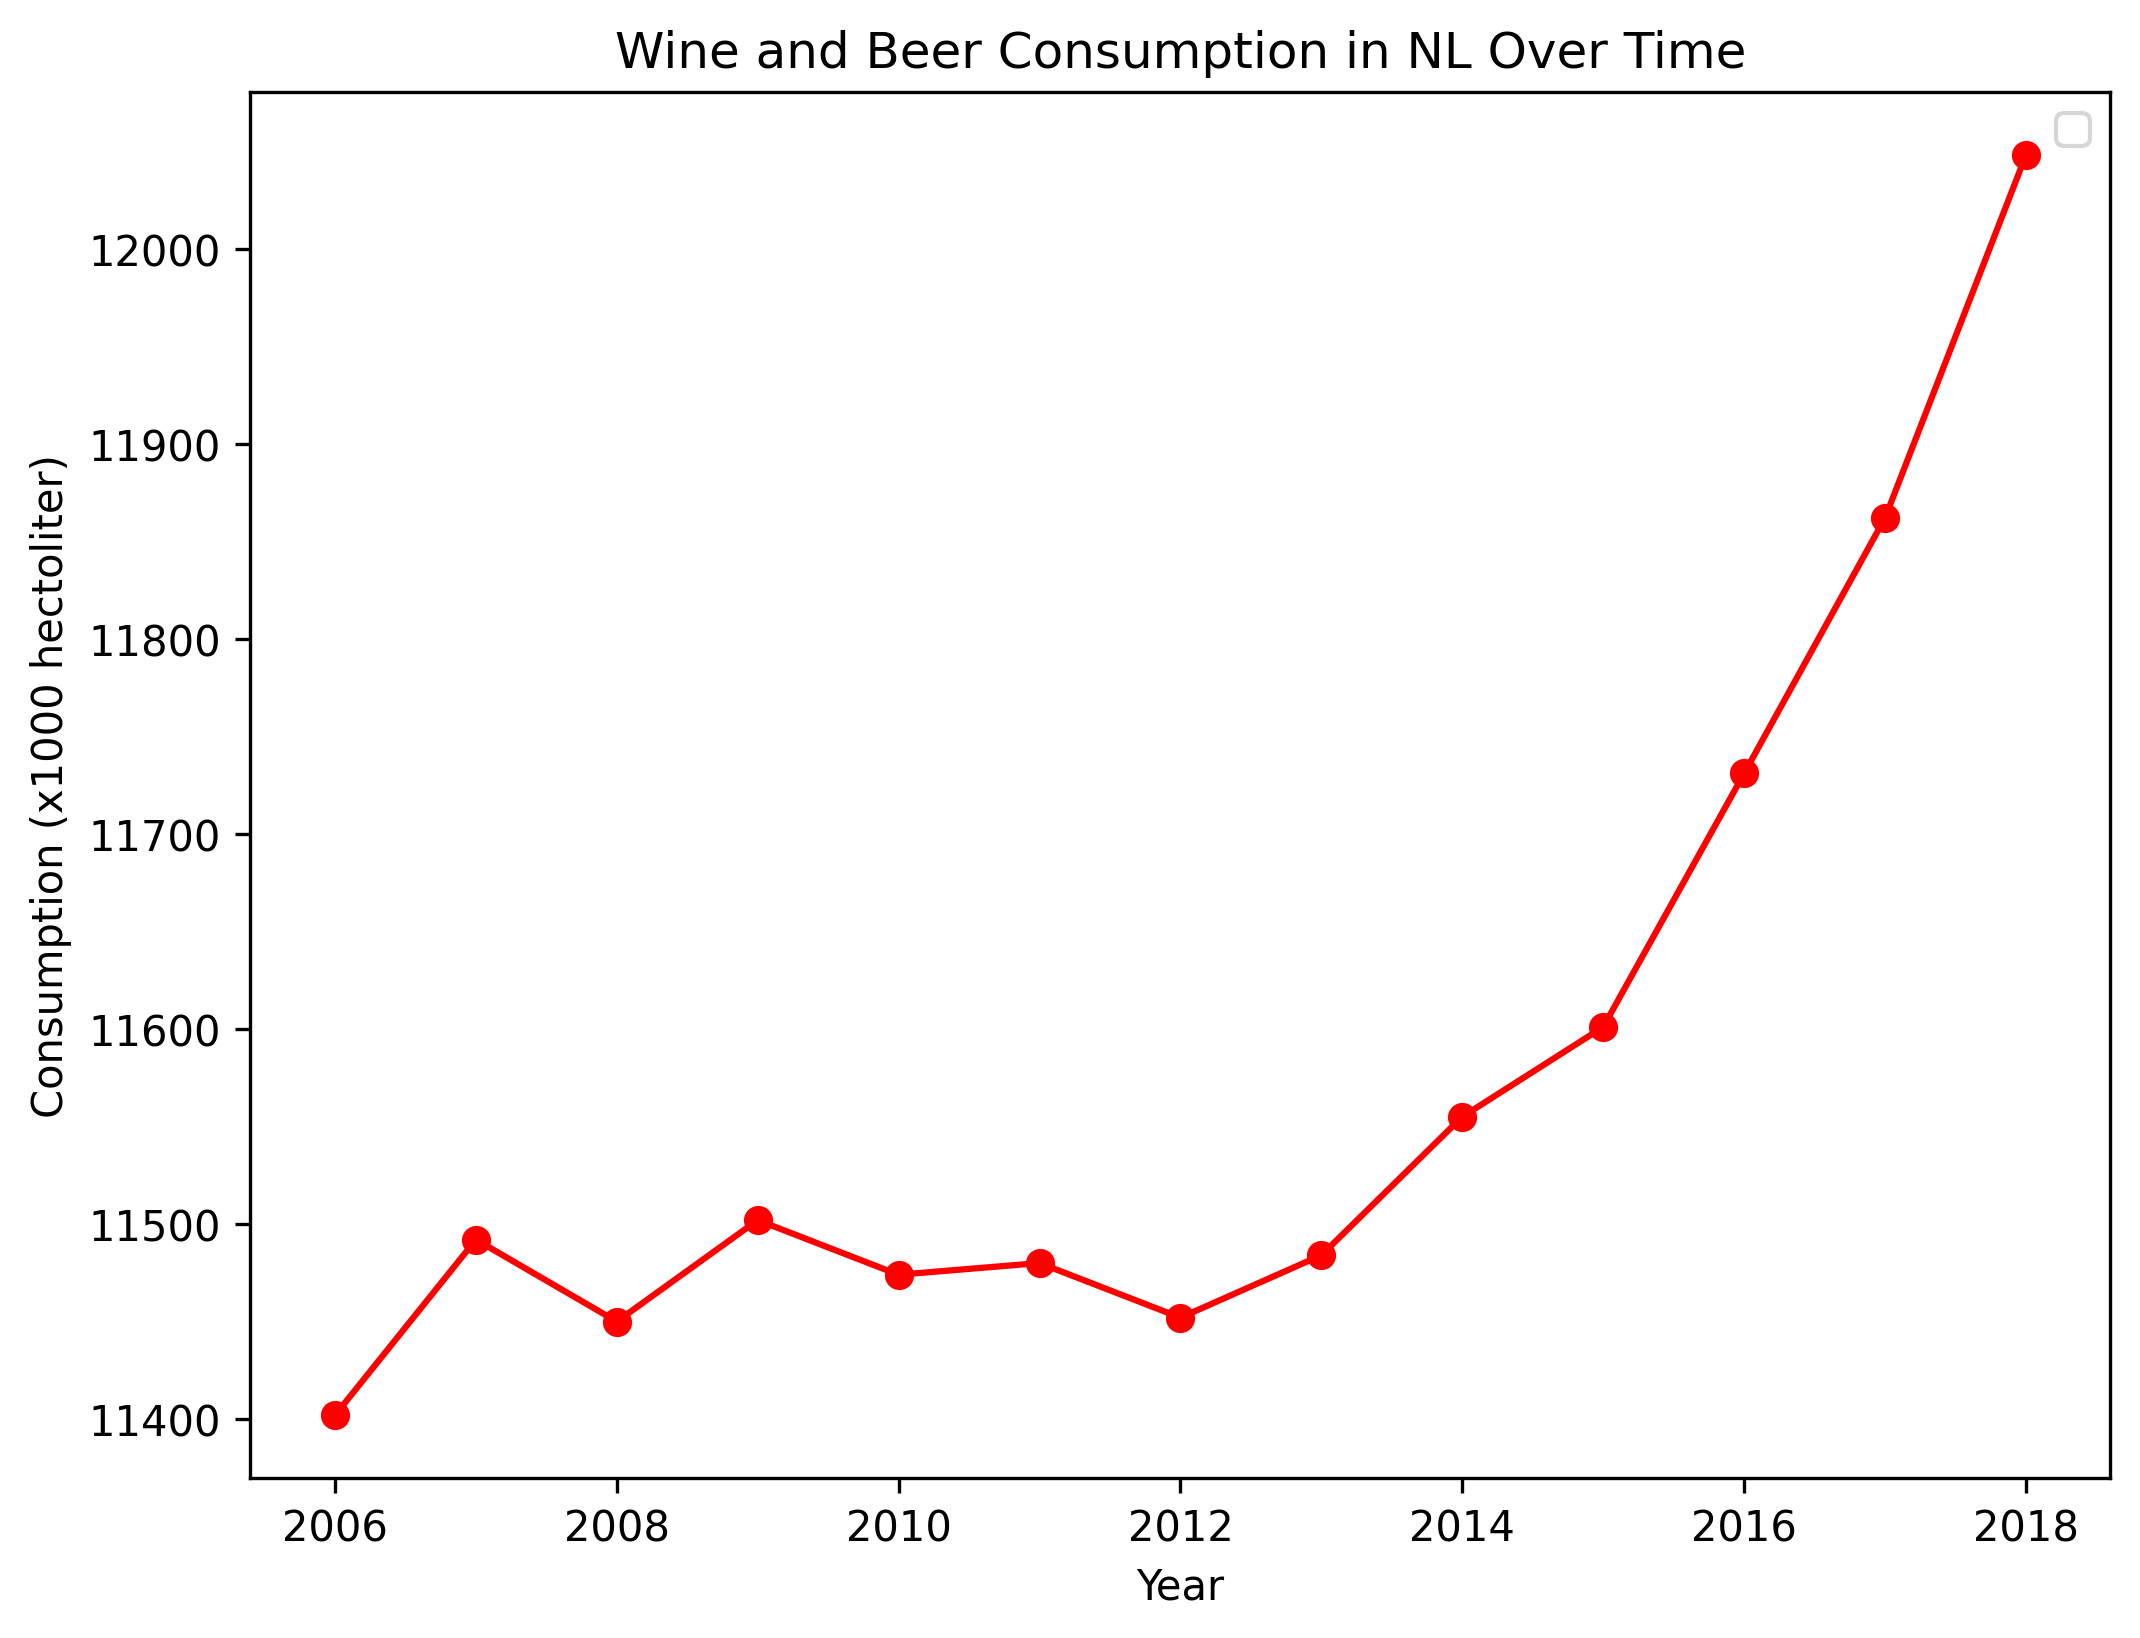

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('istherecorrelation.csv', delimiter=';')

# Create the plot
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(df['Year'], df['NL Beer consumption [x1000 hectoliter]'], marker='o', color='r')

# Labeling and showing the plot
plt.xlabel('Year')
plt.ylabel('Consumption (x1000 hectoliter)')
plt.title('Wine and Beer Consumption in NL Over Time')
plt.legend()
plt.savefig('wine_consumption.png')
plt.show()